In [25]:
import kaggle 
import pandas as pd
import seaborn as sns
import numpy as np
import re
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import SGD
from keras.constraints import maxnorm

RANDOM_SEED=420

In [26]:
df = pd.read_csv('Datasets/training_data.csv',encoding = "ISO-8859-1")
dftest = pd.read_csv('Datasets/test_data.csv',encoding = "ISO-8859-1")

In [3]:
df.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [6]:
df.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [409]:
df.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


In [7]:
print(df.isna().sum())

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64


In [4]:
print(df.AVERAGE_SPEED_DIFF.unique())
print(df.LUMINOSITY.unique())
print(df.AVERAGE_CLOUDINESS.unique())
print(df.city_name.unique())
print(df.AVERAGE_RAIN.unique())
print(df.AVERAGE_PRECIPITATION.unique())
print(df.record_date.unique())

['Medium' 'High' 'None' 'Low' 'Very_High']
['LIGHT' 'LOW_LIGHT' 'DARK']
[nan 'céu claro' 'nuvens dispersas' 'céu pouco nublado' 'céu limpo'
 'algumas nuvens' 'nuvens quebrados' 'tempo nublado' 'nuvens quebradas'
 'nublado']
['Porto']
[nan 'chuva fraca' 'chuva' 'chuva leve' 'chuvisco fraco' 'chuva moderada'
 'trovoada com chuva leve' 'aguaceiros' 'aguaceiros fracos'
 'chuva de intensidade pesada' 'trovoada com chuva'
 'chuva de intensidade pesado' 'chuva forte' 'chuvisco e chuva fraca']
[0.]
['2019-08-29 07:00:00' '2018-08-10 14:00:00' '2019-09-01 16:00:00' ...
 '2018-10-02 04:00:00' '2019-01-30 01:00:00' '2019-06-15 21:00:00']


In [27]:
#city_name e AVERAGE_PRECIPITATION só tem uma entrada por isso são inuteis
df_prepared=df.drop(['city_name','AVERAGE_PRECIPITATION'],axis=1)
dftest=dftest.drop(['city_name','AVERAGE_PRECIPITATION'],axis=1)

In [5]:
df_prepared.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN
0,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,NaN
1,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,NaN
2,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,NaN
3,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,NaN
4,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,NaN


In [28]:
#transformei o LUMINOSITY podemos dar drop mais tarde
df_prepared['LUMINOSITY'].replace({"DARK": 0, "LOW_LIGHT": 1, "LIGHT": 2}, inplace=True)
dftest['LUMINOSITY'].replace({"DARK": 0, "LOW_LIGHT": 1, "LIGHT": 2}, inplace=True)


In [29]:
#Quantificar AVERAGE_CLOUDINESS
df_prepared['AVERAGE_CLOUDINESS'].replace({"céu limpo": 0, "céu claro": 1, "nuvens dispersas": 2,"nuvens quebrados": 3,"nuvens quebradas": 3,"algumas nuvens": 4,"céu pouco nublado":5,'tempo nublado': 6,'nublado': 6}, inplace=True)
dftest['AVERAGE_CLOUDINESS'].replace({"céu limpo": 0, "céu claro": 1, "nuvens dispersas": 2,"nuvens quebrados": 3,"nuvens quebradas": 3,"algumas nuvens": 4,"céu pouco nublado":5,'tempo nublado': 6,'nublado': 6}, inplace=True)

In [30]:
#Dei drop porque tem varios nulos e podem não ser tão impactantes
#tratamos e testamos mais tarde
df_prepared=df_prepared.drop(['AVERAGE_RAIN'],axis=1)
dftest=dftest.drop(['AVERAGE_RAIN'],axis=1)


In [31]:
#Fill null AVERAGE_CLOUDINESS
df_prepared['AVERAGE_CLOUDINESS']=df_prepared['AVERAGE_CLOUDINESS'].fillna(method='bfill')
df_prepared['AVERAGE_CLOUDINESS']=df_prepared['AVERAGE_CLOUDINESS'].fillna(method='ffill')
dftest['AVERAGE_CLOUDINESS']=dftest['AVERAGE_CLOUDINESS'].fillna(method='bfill')
dftest['AVERAGE_CLOUDINESS']=dftest['AVERAGE_CLOUDINESS'].fillna(method='ffill')

In [8]:
#Drop luminosity pode não ser importante
df_prepared=df_prepared.drop(['LUMINOSITY'],axis=1)
dftest=dftest.drop(['LUMINOSITY'],axis=1)

In [32]:
#Passar data para apenas a hora e passar a inteiro
df_prepared['record_date']=df_prepared['record_date'].str.slice(11,-6).astype(int)
dftest['record_date']=dftest['record_date'].str.slice(11,-6).astype(int)

In [33]:
#Passar main column para numeros
df_prepared['AVERAGE_SPEED_DIFF'].replace({"None": 0, "Low": 1, "Medium": 2, "High": 3, "Very_High": 4}, inplace=True)
#df_prepared['AVERAGE_SPEED_DIFF'].replace({0:"None", 1:"Low", 2:"Medium", 3:"High", 4:"Very_High"}, inplace=True)
df_prepared.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,7,2,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,1.0
1,14,3,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,1.0
2,16,3,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,1.0
3,11,3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,1.0
4,12,2,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,2.0


In [45]:
df_prepared=df_prepared.drop(['AVERAGE_TEMPERATURE','AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_WIND_SPEED','AVERAGE_CLOUDINESS'],axis=1)
dftest=dftest.drop(['AVERAGE_TEMPERATURE','AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_WIND_SPEED','AVERAGE_CLOUDINESS'],axis=1)

In [40]:
dftest.head()
df_prepared.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,7,Medium,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,1.0
1,14,High,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,1.0
2,16,High,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,1.0
3,11,High,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,1.0
4,12,Medium,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,2.0


In [89]:
x = df_prepared.drop(['AVERAGE_SPEED_DIFF'], axis=1)
y = df_prepared['AVERAGE_SPEED_DIFF'].to_frame()

In [12]:
x

,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,7,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,1.0
1,14,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,1.0
2,16,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,1.0
3,11,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,1.0
4,12,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...
6807,9,41.2,3.7,86.9,2,9.0,1030.0,71.0,4.0,1.0
6808,18,38.9,51.9,76.9,2,17.0,1020.0,63.0,6.0,1.0
6809,4,39.6,0.0,89.1,0,15.0,1020.0,39.0,4.0,1.0
6810,1,41.6,0.0,85.5,0,8.0,1018.0,81.0,1.0,4.0


In [13]:
y

,AVERAGE_SPEED_DIFF
0,2
1,3
2,3
3,3
4,2
...,...
6807,1
6808,2
6809,0
6810,0


In [90]:
#Without Split
x_train = x
y_train = y
x_test = dftest

In [39]:
#Split for test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
#GridSearch
cross_valid_model = DecisionTreeClassifier(random_state=1010)
scores=cross_val_score(cross_valid_model,x_train,np.ravel(y_train),cv=10)
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'ccp_alpha': [0.1, .01, .001],'criterion':['gini','entropy']}
grid = HalvingGridSearchCV(cross_valid_model,param_grid,refit=True,cv=5)
grid.fit(x_train,np.ravel(y_train))

HalvingGridSearchCV(estimator=DecisionTreeClassifier(random_state=1010),
                    param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                                'criterion': ['gini', 'entropy'],
                                'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15,
                                              20, 30, 40, 50, 70, 90, 120,
                                              150],
                                'max_features': ['auto', 'sqrt', 'log2']},
                    refit=<function _refit_callable at 0x7fc5c55368b0>)

In [35]:
grid_predictions=grid.predict(x_test)
print("%0.2f accuracy" % (accuracy_score(y_test,grid_predictions)))

0.74 accuracy


In [20]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth=7)
scores=cross_val_score(clf,x_train,y_train,cv=10)
print("RESULT: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(),scores.std()))

RESULT: 0.75 accuracy with a standard deviation of 0.01


In [223]:
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)
predictions

array(['None', 'Medium', 'Medium', ..., 'High', 'None', 'Low'],
      dtype=object)

In [224]:
print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))

0.78 accuracy


In [341]:
#LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
preditcions = lm.predict(x_test)
preditcions

array([[0.69698539],
       [1.17806407],
       [0.42232671],
       ...,
       [0.39679915],
       [3.05597154],
       [1.3077712 ]])

In [136]:
test = pd.read_csv('example_submission.csv',encoding = "ISO-8859-1")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RowId       1500 non-null   int64 
 1   Speed_Diff  1500 non-null   object
dtypes: int64(1), object(1)
memory usage: 23.6+ KB


In [139]:
test.tail()

,RowId,Speed_Diff
1495,1496,Medium
1496,1497,Medium
1497,1498,Medium
1498,1499,Medium
1499,1500,Medium


In [138]:
predictions.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [96]:
#KMeans
kmeans = KMeans(n_clusters=5,random_state=1010)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=1010)

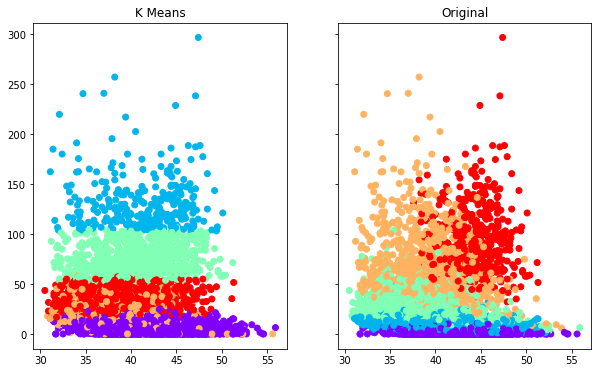

In [106]:
f, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(x.iloc[:,1],x.iloc[:,2],c=kmeans.labels_,cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(x.iloc[:,1],x.iloc[:,2],c=np.ravel(y),cmap='rainbow')

In [101]:
#Generate submission csv
ids = list(range(1,1500))
submission = pd.DataFrame(predictions,columns=['Speed_Diff'])
submission.rename(columns={'Unnamed: 0': 'RowId'},inplace=True)
submission.to_csv('submission5.csv',index=True)

In [102]:
submission = pd.read_csv('submission5.csv',encoding = "ISO-8859-1")
submission['Speed_Diff'].replace({0:"None", 1:"Low", 2:"Medium", 3:"High", 4:"Very_High"}, inplace=True)
submission.rename(columns={'Unnamed: 0': 'RowId'},inplace=True)
submission["RowId"] = 1 + submission["RowId"]
submission.to_csv('submission5.csv',index=False)
submission = pd.read_csv('submission5.csv',encoding = "ISO-8859-1")
submission.head()

,RowId,Speed_Diff
0,1,Medium
1,2,High
2,3,Medium
3,4,High
4,5,High


In [276]:
#SVC
#model = SVC()
model = SVC(kernel='rbf', C=3, random_state=42)
model.fit(x_train,y_train['AVERAGE_SPEED_DIFF'])
#predictions=model.predict(x_test)

SVC(C=3, random_state=42)

In [19]:
cross_valid_model = SVC(random_state=1010)
scores=cross_val_score(cross_valid_model,x_train,np.ravel(y_train),cv=25)

NameError: name 'x_train' is not defined

In [13]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(),scores.std()))

0.56 accuracy with a standard deviation of 0.01


In [27]:
#SVC
model = SVC()
model.fit(x_train,np.ravel(y_train))
predictions=model.predict(x_test)

In [30]:
print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))

0.55 accuracy


In [47]:
#GridSearch
param_grid = dict()
param_grid['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
param_grid['gamma'] = [1,0.1,0.01,0.001,0.0001,'auto']
# define search
svm_linear = {'C': [0.1,1,10,100,1000],'kernel':['linear']}
svm_others = {'C': [0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001,'auto'],'kernel':['rbf']}
#param_grid = [svm_linear,svm_others]
grid = HalvingGridSearchCV(cross_valid_model,param_grid,scoring='accuracy',n_jobs=-1,refit=True,verbose=3,cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1))
grid.fit(x_train,np.ravel(y_train))

n_iterations: 3
n_required_iterations: 4
n_possible_iterations: 3
min_resources_: 300
max_resources_: 5449
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 48
n_resources: 300
Fitting 30 folds for each of 48 candidates, totalling 1440 fits
----------
iter: 1
n_candidates: 16
n_resources: 900
Fitting 30 folds for each of 16 candidates, totalling 480 fits
----------
iter: 2
n_candidates: 6
n_resources: 2700
Fitting 30 folds for each of 6 candidates, totalling 180 fits


HalvingGridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                    estimator=SVC(random_state=1010), n_jobs=-1,
                    param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                      100],
                                'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto']},
                    refit=<function _refit_callable at 0x7f003e6cca60>,
                    scoring='accuracy', verbose=3)

In [48]:
grid_predictions=grid.predict(x_test)

In [49]:
print("%0.2f accuracy" % (accuracy_score(y_test,grid_predictions)))

0.79 accuracy


In [41]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [81]:
scaler_x = MinMaxScaler(feature_range=(0,1)).fit(x)
x_scaled = pd.DataFrame(scaler_x.transform(x[x.columns]),columns=x.columns)
#onehot_encoder = OneHotEncoder(sparse=False)
#y_encoded = onehot_encoder.fit_transform(y)

In [105]:
scaler_x1 = MinMaxScaler(feature_range=(0,1)).fit(x_test)
xtest_scaled = pd.DataFrame(scaler_x.transform(x_test[x_test.columns]),columns=x_test.columns)
scaler_x2 = MinMaxScaler(feature_range=(0,1)).fit(x_train)
xtrain_scaled = pd.DataFrame(scaler_x.transform(x_train[x_train.columns]),columns=x_train.columns)

In [107]:
xtrain_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   record_date              6812 non-null   float64
 1   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 2   AVERAGE_TIME_DIFF        6812 non-null   float64
 3   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 4   LUMINOSITY               6812 non-null   float64
 5   AVERAGE_TEMPERATURE      6812 non-null   float64
 6   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 7   AVERAGE_HUMIDITY         6812 non-null   float64
 8   AVERAGE_WIND_SPEED       6812 non-null   float64
 9   AVERAGE_CLOUDINESS       6812 non-null   float64
dtypes: float64(10)
memory usage: 532.3 KB


In [174]:
encoder = LabelEncoder()
encoder.fit(np.ravel(y))
encoded_y = encoder.transform(np.ravel(y))
y_encoded = to_categorical(y)
y_encoded[:5]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [77]:
def build_model(activation='relu',learn_rate=0.001,momentum=0.4,init_mode='uniform'):
    model=Sequential()
    model.add(Dense(16,input_dim=x_train.shape[1],activation=activation,kernel_initializer=init_mode))
    model.add(Dense(32,activation=activation,kernel_initializer=init_mode))
    model.add(Dense(32,activation=activation,kernel_initializer=init_mode))
    model.add(Dense(32,activation=activation,kernel_initializer=init_mode))
    model.add(Dense(5,activation="sigmoid",kernel_initializer=init_mode))
    model.compile(
        loss = "binary_crossentropy",
        optimizer = tf.optimizers.Adam(learn_rate,momentum),
        metrics=['accuracy'])
    return model

In [91]:
x_train,x_test,y_trainf,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=RANDOM_SEED)
y_train=to_categorical(y_train)

In [85]:
x_test.head()

,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,23,39.2,0.0,91.0,0,8.0,1026.0,71.0,1.0,1.0
1,20,42.5,12.2,76.8,0,11.0,1020.0,93.0,4.0,2.0
2,5,45.9,0.0,86.3,0,14.0,1017.0,93.0,0.0,5.0
3,17,33.2,51.7,89.9,2,22.0,1016.0,77.0,4.0,5.0
4,6,44.0,3.5,85.5,0,12.0,1004.0,100.0,9.0,3.0


In [96]:
TUNING_DICT = {
    #'learn_rate' : [0.0001,0.001,0.01,0.1,0.2],
    #'momentum' : [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
    #'init_mode' : ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
    #'activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
    #'weight_constraint' : [1, 2, 3, 4, 5],
    #'dropout_rate' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    #'batch_size' : [10, 20, 40, 60, 80, 100],
    #'epochs' : [10, 50, 100]
    #'optimizer' : ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
}

In [126]:
TUNING_DICT = {
    #'learn_rate' : [0.001,0.01],
    #'momentum' : [0.4, 0.6, 0.8, 0.9],
    #'init_mode' : ['uniform', 'lecun_uniform', 'glorot_normal', 'glorot_uniform'],
    'activation' : ['softsign', 'relu', 'tanh', 'linear']
}

In [54]:
kf = KFold(n_splits=3,shuffle=True,random_state=RANDOM_SEED)
#RandomizedSearchCV
model = KerasClassifier(build_fn=build_model,epochs=100,batch_size=80,verbose=0)
grid_search = HalvingGridSearchCV(estimator=model,
                          param_grid=TUNING_DICT,
                          cv=kf,
                          refit='False',
                          verbose=1)
grid_search.fit(x_train,y_train,validation_split=0.2,verbose=1)

NameError: name 'TUNING_DICT' is not defined

In [ ]:
kf = KFold(n_splits=10,shuffle=True)
#RandomizedSearchCV
model = KerasClassifier(build_fn=build_model,epochs=100,batch_size=80,verbose=0)
model.fit(xtrain_scaled,y_train,verbose=1)

Epoch 1/100
86/86 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.2728
Epoch 2/100
86/86 [==============================] - 0s 4ms/step - loss: 0.4782 - accuracy: 0.3230
Epoch 3/100
86/86 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.3230
Epoch 4/100
86/86 [==============================] - 0s 4ms/step - loss: 0.4666 - accuracy: 0.3230
Epoch 5/100
86/86 [==============================] - 0s 4ms/step - loss: 0.4562 - accuracy: 0.3230
Epoch 6/100
86/86 [==============================] - 1s 6ms/step - loss: 0.4176 - accuracy: 0.3900
Epoch 7/100
86/86 [==============================] - 0s 4ms/step - loss: 0.3556 - accuracy: 0.5686
Epoch 8/100
86/86 [==============================] - 0s 4ms/step - loss: 0.3202 - accuracy: 0.6145
Epoch 9/100
86/86 [==============================] - 0s 4ms/step - loss: 0.2923 - accuracy: 0.6333
Epoch 10/100
86/86 [==============================] - 0s 4ms/step - loss: 0.2681 - accuracy: 0.6696
Epoch 11/

In [109]:
predictions = model.predict(xtest_scaled)
#print("%0.2f accuracy" % (accuracy_score(np.ravel(y_test),predictions)))

In [110]:
predictions[:5]

array([0, 2, 0, 3, 1])

In [116]:
grid_search.best_params_
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))
means=grid_search.cv_results_['mean_test_score']
stds=grid_search.cv_results_['std_test_score']
params=grid_search.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

Best: 0.767850 using {'momentum': 0.4, 'learn_rate': 0.001, 'activation': 'tanh'}
0.767850 (0.023806) with: {'momentum': 0.4, 'learn_rate': 0.001, 'activation': 'tanh'}
0.686182 (0.013712) with: {'momentum': 0.6, 'learn_rate': 0.001, 'activation': 'linear'}
0.767483 (0.007188) with: {'momentum': 0.6, 'learn_rate': 0.01, 'activation': 'softsign'}
0.220029 (0.055298) with: {'momentum': 0.8, 'learn_rate': 0.1, 'activation': 'tanh'}
0.689674 (0.025661) with: {'momentum': 0.8, 'learn_rate': 0.01, 'activation': 'linear'}


In [117]:
best_mlp_model=grid_search.best_estimator_
def plot_learning_curve(history,metric='accuracy'):
    plt.figure(figsize=(8,4))
    plt.title('Trainnig accuracy vs Validation accuracy')
    plt.plot(history.epoch,history.history['accuracy'],label='train')
    plt.plot(history.epoch,history.history['val_accuracy'],label='val')
    plt.ylabel('Training' + metric)
    plt.xlabel('Epochs')
    plt.legend()

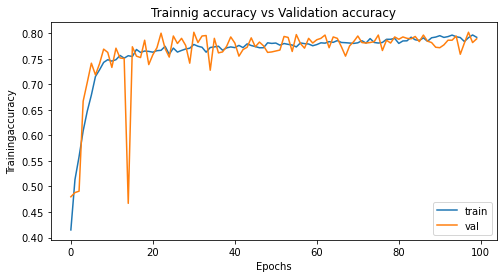

In [118]:
plot_learning_curve(best_mlp_model.model.history, metric='accuracy')

In [108]:
predictions = best_mlp_model.predict(x_test)
predictions[:5]

NameError: name 'best_mlp_model' is not defined

In [120]:
print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))

0.77 accuracy
